## COVID 19 临床信息整理
**注意：**
1. 更新时间为2021.04.31
2. 数据来源为：https://clinicaltrials.gov
3. 数据存放在当前目录下，Data文件夹中

## COVID 19 Clinical Trial
**Note:**
1. Update time is 2021.04.31
2. The Data Source : https://clinicaltrials.gov
3. The Data is in './Data'


### 1.
###  导入需要的包
###  import package

In [4]:
#--coding:utf-8--
import os
import sys
import folium
import shutil
import pickle
import pandas as pd
import matplotlib.pyplot as plt

### 2
### 编写一个类用于处理数据
### Make a class to manipulate the data

In [5]:
# 使用minidom解析器打开 XML 文档
class Parse_nct:
    print('Update Time:2021.04.31')
    data_csv = '/Data/clinical_trial.csv'
    data_path = '/Data'
    basepath = os.path.abspath('./')
    def __init__(self):
        pass
    @staticmethod
    def get_ori_data(path):
        shutil.copytree(Parse_nct.basepath + Parse_nct.data_path,path)

    @classmethod
    def df_data(cls):
        return pd.read_csv(cls.basepath + cls.data_csv)
    @classmethod
    def get_geo_data(cls):
        f = open(cls.basepath+'/geo.pkl','rb')
        geo_dict = pickle.load(f)
        return geo_dict
    @staticmethod
    def get_map(data_df,geo_dict,phase_li = ['Early Phase 1', 'Phase 1','Phase 1/Phase 2', 'Phase 2', 'Phase 2/Phase 3', 'Phase 3', 'Phase 4']):        
        color_li = {'Early Phase 1':'lightgray',
                    'Phase 1':'gray',
                    'Phase 1/Phase 2':'orange',
                    'Phase 2':'lightred',
                    'Phase 2/Phase 3':'lightblue',
                    'Phase 3':'blue',
                    'Phase 4':'green'}
        m = folium.Map(location=[39.917834, -10], zoom_start=2,zoom_control='False')
        for i in  range(len(data_df['zip_code'])):
            if data_df['city'][i] is not None and data_df['phase'][i] in phase_li:
                tooltip = data_df['brief_title'][i] + '<br>点击;Click Me'
                text = 'NCT:' + data_df['NCT_id'][i] +'<br>Phase:' + data_df['phase'][i]  + '<br>Country:' + data_df['location_countries'][i]  + '<br>City:' + data_df['city'][i] + '<br>Sponsors:'  + data_df['sponsors'][i] + '<br>Start_date:'  + data_df['start_date'][i] + '<br>Overall_status:'  + data_df['overall_status'][i] 
                if str(geo_dict[data_df['city'][i]]) != 'None':
                    folium.Marker(geo_dict[data_df['city'][i]], 
                                    popup = text, 
                                    tooltip = tooltip, 
                                    icon = folium.Icon(color=color_li[data_df['phase'][i]] , prefix='fa', icon='user-md')).add_to(m)
        return m
    #get city_geo
    def __get_geo(city):
        try:
            geolocator = Nominatim(user_agent="PO Automation Tool")
            geocode = partial(geolocator.geocode, language="en")
            from_location = geolocator.geocode(FromZipCode)
            from_points = (from_location.latitude,from_location.longitude)
            return from_points
        except:
            None


Update Time:2021.04.31


### 3
### 获取临床实验数据
###  Access to clinical trial data

In [9]:
covid19 = Parse_nct()
data_df = covid19.df_data()

In [10]:
data_df

NCT_id                                           sponsors  \
0     NCT04385004            University Hospital, Strasbourg, France   
1     NCT04426292                    Universitair Ziekenhuis Brussel   
2     NCT04847583                                  Qurient Co., Ltd.   
3     NCT04623346  Prof. Dr. Cemil Tascıoglu Education and Resear...   
4     NCT04520191                           University of New Mexico   
...           ...                                                ...   
5454  NCT04491227                University of California, San Diego   
5455  NCT04521296                   Daewoong Pharmaceutical Co. LTD.   
5456  NCT04346056                               Ain Shams University   
5457  NCT04371822                            Kafrelsheikh University   
5458  NCT04636034   University Hospital Bispebjerg and Frederiksberg   

                                            brief_title  \
0     Clinical, Biological and Histological Pulmonar...   
1     SARS-COV-2 Seroprevalence and Seroconversion A...   
2     A Phase 2 Study to Evaluate Biomarker Change, ...   
3     Orthopaedic Conservative Treatment in the Time...   
4     Home-based Kidney Care in Native Americans of ...   
...                                                 ...   
5454  Global Assessment of Acute and Chronic Kidney ...   
5455  Efficacy and Safety of DWJ1248 in Patients Wit...   
5456  Retrospective Study on Severe Respiratory Illn...   
5457  Efficacy of Sunlight Activated Synthetic Porph...   
5458  The Effect of Ganglion Sphenopalatine Block Ve...   

                                          brief_summary intervention_type  \
0     \n      Renal damage in patients hospitalized ...   Diagnostic Test   
1     \n      A novel zoonotic coronavirus was disco...              Drug   
2     \n      This is a Phase 2, open-label, randomi...         Procedure   
3     \n      This is a one centered retrospective s...              Drug   
4     \n      Novel severe acute respiratory syndrom...              Drug   
...                                                 ...               ...   
5454  \n      The coronavirus (COVID-19) pandemic ha...               NaN   
5455  \n      To evaluate the efficacy and safety af...               NaN   
5456  \n      Retrospective study from November 2019...               NaN   
5457  \n      Efficacy of Sunlight Activated Synthet...               NaN   
5458  \n      The purpose of this study is to evalua...               NaN   

                intervention_name    phase         start_date  \
0             Serological testing     None     April 27, 2020   
1                       Telacebec      NaN       May 12, 2020   
2     Observation for study group  Phase 2     April 30, 2021   
3               50 mg/mL Virazole     None     March 11, 2020   
4                        Placebos     None  September 1, 2020   
...                           ...      ...                ...   
5454                          NaN     None        May 5, 2020   
5455                          NaN  Phase 2        August 2020   
5456                          NaN     None     April 14, 2020   
5457                          NaN  Phase 1        August 2020   
5458                          NaN  Phase 3   January 12, 2021   

               overall_status enrollment  \
0                  Recruiting        320   
1                  Recruiting       3500   
2          Not yet recruiting         66   
3      Active, not recruiting        262   
4          Not yet recruiting        529   
...                       ...        ...   
5454  Enrolling by invitation       2000   
5455       Not yet recruiting         90   
5456               Recruiting        500   
5457       Not yet recruiting         56   
5458               Recruiting         60   

                                          criteria_text  \
0     \n        Inclusion Criteria:\r\n\r\n         ...   
1     \n        Inclusion Criteria:\r\n\r\n         ...   
2     \n        Inclusion

### 4
### 获取某个国家临床实验数据
###  Access to clinical trial data of a apecial country

In [11]:
# 美国,US
us_df = data_df[(data_df['location_countries'] == 'United States')]

In [12]:
us_df

NCT_id                                           sponsors  \
6     NCT04343651                                      CytoDyn, Inc.   
8     NCT04283461  National Institute of Allergy and Infectious D...   
9     NCT04480333                                  NeuroActiva, Inc.   
14    NCT04663776                         Boston Children's Hospital   
15    NCT04765475    Johns Hopkins Bloomberg School of Public Health   
...           ...                                                ...   
5443  NCT04720118                                  Towson University   
5444  NCT04349371                                Columbia University   
5446  NCT04394104        Rutgers, The State University of New Jersey   
5447  NCT04843930        Weill Medical College of Cornell University   
5451  NCT04587323                University of Alabama at Birmingham   

                                            brief_title  \
6     Study to Evaluate the Efficacy and Safety of L...   
8     Safety and Immunogenicity Study of 2019-nCoV V...   
9     Safety, Tolerability and Pharmacokinetics of I...   
14    Wide Scale Monitoring for Acute Respiratory In...   
15             Protecting Native Families From COVID-19   
...                                                 ...   
5443  Parkinson's Disease and Experiences Throughout...   
5444                                Saved From COVID-19   
5446                           COVID-19 Wellness Survey   
5447   Improving Cognitive Health in COVID-19 Survivors   
5451  VEGF and sFlt-1 Levels in the Pathogenesis and...   

                                          brief_summary intervention_type  \
6     \n      This is a Phase 2, two-arm, randomized...        Biological   
8     \n      This is a phase I, open-label, dose-ra...             Other   
9     \n      The clinical study is designed to eval...             Other   
14    \n      This is a prospective observational st...              Drug   
15    \n      The goal of this study is to increase ...            Device   
...                                                 ...               ...   
5443  \n      The purpose of this research study is ...               NaN   
5444  \n      The primary objective is to determine ...               NaN   
5446  \n      This study will collect data on physic...               NaN   
5447  \n      The primary objective of this study is...               NaN   
5451  \n      To assess blood levels of vasoactive m...               NaN   

                                      intervention_name    phase  \
6                                             mRNA-1273  Phase 2   
8                                 Collection of samples  Phase 1   
9                                              Exposure  Phase 1   
14    3-dayIVM 200 mcg/kg/day/14-day 75mgASA/day + s...     None   
15                                          Oxygen Hood      NaN   
...                                                 ...      ...   
5443                                                NaN     None   
5444                                                NaN  Phase 2   
5446                                                NaN     None   
5447                                                NaN  Phase 2   
5451                                                NaN     None   

              start_date          overall_status enrollment  \
6          April 1, 2020  Active, not recruiting         86   
8         March 16, 2020  Active, not recruiting        120   
9     September 15, 2020              Recruiting         45   
14      November 4, 2020              Recruiting     100000   
15         March 8, 2021              Recruiting        600   
...                  ...                     ...        ...   
5443       March 1, 2021              Recruiting        150   
5444      April 21, 2020              Terminated          8   
5446        May 27, 2020              Terminated        593   
5447          April 2021      Not yet recruiting        125   
54

In [37]:
# 中国,China
cn_df = data_df[(data_df['location_countries'] == 'China') | (data_df['location_countries'] == 'Hong Kong') |  (data_df['location_countries'] == 'Taiwan')]

In [38]:
cn_df

NCT_id                                           sponsors  \
45    NCT04714515                             University of Sargodha   
89    NCT04496141                    Hong Kong Sanatorium & Hospital   
147   NCT04611243                    Chinese University of Hong Kong   
203   NCT04272710                       Chongqing Medical University   
205   NCT04756323              Beijing Minhai Biotechnology Co., Ltd   
...           ...                                                ...   
5332  NCT04368793                    China-Japan Friendship Hospital   
5355  NCT04395781                 KK Women's and Children's Hospital   
5370  NCT04516837                Peking University People's Hospital   
5400  NCT04452708                    Chinese University of Hong Kong   
5427  NCT04568655  The First Affiliated Hospital of Guangzhou Med...   

                                            brief_title  \
45        Montelukast - a Treatment Choice for COVID-19   
89    Evaluation of Commercial SARS-CoV-2 Antibody I...   
147   Lung Function, Exercise Capacity, and Serology...   
203   Prognositc Factors in COVID-19 Patients Compli...   
205   A Study to Evaluate Safety and Immunogenicity ...   
...                                                 ...   
5332  Clinical Effects of Internet Assisted Pulmonar...   
5355  Pediatric Acute and Critical Care COVID-19 Reg...   
5370  Eltrombopag Plus rhTPO Versus Eltrombopag for ...   
5400  HFNC and NIV for COVID-19 Complicated by Respi...   
5427   The Noninvasive Ventilation to COVID-19 Patients   

                                          brief_summary intervention_type  \
45    \n      The current study aimed to make a ther...              Drug   
89    \n      Achieved serum samples of persons with...         Procedure   
147   \n      (a) Objectives\r\n\r\n        1. To as...   Diagnostic Test   
203   \n      There are currently no clinical studie...             Other   
205   \n      This study is a randomized, double-bli...        Biological   
...                                                 ...               ...   
5332  \n      The noval coronavirus disease 2019 (CO...               NaN   
5355  \n      In December 2019, an outbreak of pneum...               NaN   
5370  \n      This is a prospective, multicenter, ra...               NaN   
5400  \n      Background: Patients with COVID-19 hav...               NaN   
5427  \n      Noninvasive ventilation(NIV) is an imp...               NaN   

                                      intervention_name    phase  \
45                                            Duvelisib     None   
89                                 Operative management     None   
147                     SARS-CoV-2/Influenza/RSV RT-PCR     None   
203      This is an online survey with no intervention.     None   
205   SARS-CoV-2 recombinant protein vaccine Formula...  Phase 2   
...                                                 ...      ...   
5332                                                NaN     None   
5355                                                NaN     None   
5370                                                NaN  Phase 2   
5400                                                NaN     None   
5427                                                NaN     None   

             start_date          overall_status enrollment  \
45    February 20, 2020               Completed        150   
89        July 27, 2020  Active, not recruiting         70   
147        May 22, 2020              Recruiting         80   
203    January 25, 2020               Withdrawn          0   
205    October 27, 2020  Active, not recruiting       1000   
...                 ...                     ...        ...   
5332      April 6, 2020              Recruiting        200   
5355       May 18, 2020              Recruiting       2000   
5370    August 31, 2020              Recruiting        120   
5400      June 11, 2020              Recruiting         15   
5427   Februa

### 5
### 获取不同分类的临床试验数据
### Access to clinical trial data of different categories

In [219]:
print(set(data_df['intervention_type']))

{'Dietary Supplement', 'Radiation', 'Biological', nan, 'Diagnostic Test', 'Procedure', 'Combination Product', 'Device', 'Behavioral', 'Genetic', 'Drug', 'Other'}


In [230]:
# 干涉类型为药物的临床实验
# drug , clinical trial 
drug_df = data_df[(data_df['intervention_type'] == 'Drug') ]

In [225]:
drug_df

NCT_id                                           sponsors  \
1     NCT04426292                    Universitair Ziekenhuis Brussel   
3     NCT04623346  Prof. Dr. Cemil Tascıoglu Education and Resear...   
4     NCT04520191                           University of New Mexico   
7     NCT04527198            Assistance Publique - Hôpitaux de Paris   
10    NCT04361396                      Centre Hospitalier René Dubos   
...           ...                                                ...   
4594  NCT04834375                                   Northwell Health   
4595  NCT04492891                                     Bryan Burt, MD   
4598  NCT04498416                                   Fondation Lenval   
4602  NCT04830852             Children's National Research Institute   
4603  NCT04604678                                          AgelessRx   

                                            brief_title  \
1     SARS-COV-2 Seroprevalence and Seroconversion A...   
3     Orthopaedic Conservative Treatment in the Time...   
4     Home-based Kidney Care in Native Americans of ...   
7     Brainstem Dysfunction in COVID-19 Critically I...   
10    Assessment of the Presence of the SARS-COV-2 V...   
...                                                 ...   
4594  Randomized Open Investigation Determining Ster...   
4595      Cyclosporine For The Treatment Of COVID-19(+)   
4598  CoCo-20: a Longitudinal Follow-up Study of the...   
4602  Pediatric SARS-CoV-2 and MIS-C Long-term Follo...   
4603  Pilot Study Into the Use of Metformin and LDN ...   

                                          brief_summary intervention_type  \
1     \n      A novel zoonotic coronavirus was disco...              Drug   
3     \n      This is a one centered retrospective s...              Drug   
4     \n      Novel severe acute respiratory syndrom...              Drug   
7     \n      The purpose of this study is to determ...              Drug   
10    \n      The purpose of this study is to determ...              Drug   
...                                                 ...               ...   
4594  \n      Dexamethasone has been approved for th...              Drug   
4595  \n      Phase IIa clinical trial in which 75 n...              Drug   
4598  \n      In the context of a viral outbreak and...              Drug   
4602  \n      This is a multisite prospective observ...              Drug   
4603  \n      Study into the effects of daily use of...              Drug   

                               intervention_name    phase         start_date  \
1                                      Telacebec      NaN       May 12, 2020   
3                              50 mg/mL Virazole     None     March 11, 2020   
4                                       Placebos     None  September 1, 2020   
7                      Drug: NA-831 - 0.10 mg/kg      NaN     September 2020   
10             Chloroquine or Hydroxychloroquine      NaN      June 16, 2020   
...                                          ...      ...                ...   
4594                                 Chloroquine  Phase 4     March 19, 2021   
4595             Favipiravir (3200 mg + 1200 mg)  Phase 2  November 23, 2020   
4598                                 Tocilizumab     None     April 27, 2020   
4602                                     DWJ1248     None        May 1, 2021   
4603  SnPP Protoporphyrin plus Sunlight exposure  Phase 2      February 2021   

              overall_status enrollment  \
1                 Recruiting       3500   
3     Active, not recruiting        262   
4         Not yet recruiting        529   
7         Not yet recruiting         40   
10                Recruiting         60   
...                      ...        ...   
4594              Recruiting        142   
4595              Recruiting         75   
4598              Recruiting         70   
4602      Not yet recruiting       5000   
4603      Not yet recruiting         80   

                                  

In [232]:
# 查询疫苗的临床实验相关信息
# vaccina , clinical trial 
vaccine_df = data_df[data_df['brief_summary'].str.contains('vaccine')]

In [233]:
vaccine_df

NCT_id                                           sponsors  \
8     NCT04283461  National Institute of Allergy and Infectious D...   
13    NCT04530396  Gamaleya Research Institute of Epidemiology an...   
22    NCT04332094  Fundació Institut de Recerca de l'Hospital de ...   
33    NCT04818736                                McMaster University   
42    NCT04750343                            SK Bioscience Co., Ltd.   
...           ...                                                ...   
5369  NCT04428073                           GeneCure Biotechnologies   
5389  NCT04383652                                    Kirby Institute   
5390  NCT04318314                         University College, London   
5405  NCT04801524              University of California, Los Angeles   
5422  NCT04649151                                    ModernaTX, Inc.   

                                            brief_title  \
8     Safety and Immunogenicity Study of 2019-nCoV V...   
13    Clinical Trial of Efficacy, Safety, and Immuno...   
22    Clinical Trial of Combined Use of Hydroxychlor...   
33             COVID-19 Vaccine For Indirect Protection   
42    Safety and Immunogenicity Study of SARS-CoV-2 ...   
...                                                 ...   
5369  Therapeutic Vaccine Trial of COVID-19 for Seve...   
5389  Collection of Coronavirus COVID-19 Outbreak Sa...   
5390  COVID-19: Healthcare Worker Bioresource: Immun...   
5405  Text-based Reminders to Promote COVID-19 Vacci...   
5422  A Study to Evaluate the Safety, Reactogenicity...   

                                          brief_summary intervention_type  \
8     \n      This is a phase I, open-label, dose-ra...             Other   
13    \n      Randomized, double-blind (blinded for ...        Behavioral   
22    \n      COVID-19 is a respiratory disease caus...              Drug   
33    \n      The primary objective of this study is...        Behavioral   
42    \n      This is a first-in-human, Phase I/II, ...             Other   
...                                                 ...               ...   
5369  \n      GC004 is a Phase I trial to evaluate t...               NaN   
5389  \n      The objectives of this study are to ch...               NaN   
5390  \n      Modelling repurposed from pandemic inf...               NaN   
5405  \n      This study investigates whether and wh...               NaN   
5422  \n      The mRNA-1273 vaccine is being develop...               NaN   

                               intervention_name            phase  \
8                          Collection of samples          Phase 1   
13                 Guided online support program          Phase 3   
22                       Cytotoxic T Lymphocytes          Phase 2   
33    Biobehavioral Tele-rehabilitation Sessions          Phase 4   
42                        PROTECTIVE VENTILATION  Phase 1/Phase 2   
...                                          ...              ...   
5369                                         NaN          Phase 1   
5389                                         NaN             None   
5390                                         NaN             None   
5405                                         NaN              NaN   
5422                                         NaN  Phase 2/Phase 3   

             start_date           overall_status enrollment  \
8        March 16, 2020   Active, not recruiting        120   
13    September 7, 2020   Active, not recruiting      33758   
22        April 2, 2020               Recruiting        276   
33       April 15, 2021       Not yet recruiting       4000   
42     February 3, 2021               Recruiting        320   
...                 ...                      ...        ...   
5369          July 2020       Not yet recruiting         32   
5389        May 6, 2020               Recruiting        200   
5390     March 18, 2020               Recruiting        400   
5405   February 7, 2021  Enrolling by invitation     

In [162]:
data_df

NCT_id                                           sponsors  \
0     NCT04385004            University Hospital, Strasbourg, France   
1     NCT04426292                    Universitair Ziekenhuis Brussel   
2     NCT04847583                                  Qurient Co., Ltd.   
3     NCT04623346  Prof. Dr. Cemil Tascıoglu Education and Resear...   
4     NCT04520191                           University of New Mexico   
...           ...                                                ...   
5454  NCT04491227                University of California, San Diego   
5455  NCT04521296                   Daewoong Pharmaceutical Co. LTD.   
5456  NCT04346056                               Ain Shams University   
5457  NCT04371822                            Kafrelsheikh University   
5458  NCT04636034   University Hospital Bispebjerg and Frederiksberg   

                                            brief_title  \
0     Clinical, Biological and Histological Pulmonar...   
1     SARS-COV-2 Seroprevalence and Seroconversion A...   
2     A Phase 2 Study to Evaluate Biomarker Change, ...   
3     Orthopaedic Conservative Treatment in the Time...   
4     Home-based Kidney Care in Native Americans of ...   
...                                                 ...   
5454  Global Assessment of Acute and Chronic Kidney ...   
5455  Efficacy and Safety of DWJ1248 in Patients Wit...   
5456  Retrospective Study on Severe Respiratory Illn...   
5457  Efficacy of Sunlight Activated Synthetic Porph...   
5458  The Effect of Ganglion Sphenopalatine Block Ve...   

                                          brief_summary intervention_type  \
0     \n      Renal damage in patients hospitalized ...   Diagnostic Test   
1     \n      A novel zoonotic coronavirus was disco...              Drug   
2     \n      This is a Phase 2, open-label, randomi...         Procedure   
3     \n      This is a one centered retrospective s...              Drug   
4     \n      Novel severe acute respiratory syndrom...              Drug   
...                                                 ...               ...   
5454  \n      The coronavirus (COVID-19) pandemic ha...               NaN   
5455  \n      To evaluate the efficacy and safety af...               NaN   
5456  \n      Retrospective study from November 2019...               NaN   
5457  \n      Efficacy of Sunlight Activated Synthet...               NaN   
5458  \n      The purpose of this study is to evalua...               NaN   

                intervention_name    phase         start_date  \
0             Serological testing     None     April 27, 2020   
1                       Telacebec      NaN       May 12, 2020   
2     Observation for study group  Phase 2     April 30, 2021   
3               50 mg/mL Virazole     None     March 11, 2020   
4                        Placebos     None  September 1, 2020   
...                           ...      ...                ...   
5454                          NaN     None        May 5, 2020   
5455                          NaN  Phase 2        August 2020   
5456                          NaN     None     April 14, 2020   
5457                          NaN  Phase 1        August 2020   
5458                          NaN  Phase 3   January 12, 2021   

               overall_status enrollment  \
0                  Recruiting        320   
1                  Recruiting       3500   
2          Not yet recruiting         66   
3      Active, not recruiting        262   
4          Not yet recruiting        529   
...                       ...        ...   
5454  Enrolling by invitation       2000   
5455       Not yet recruiting         90   
5456               Recruiting        500   
5457       Not yet recruiting         56   
5458               Recruiting         60   

                                          criteria_text  \
0     \n        Inclusion Criteria:\r\n\r\n         ...   
1     \n        Inclusion Criteria:\r\n\r\n         ...   
2     \n        Inclusion

### 6
### 制作饼图进行统计
### Make a Pie Chart
CHINA，US，UK，France，Germany

In [39]:
# 统计实验的location
statics_df = data_df.loc[:,'location_countries'].value_counts()
# 获取城市的index
country_index = list(statics_df.index)

In [40]:
country_1 = ['China','Hong Kong','Taiwan']
country_2 = ['United States','France','United Kingdom']
country_3 = country_2 + country_1

In [41]:
count_1 = sum([statics_df[i] for i in range(len(country_index)) if country_index[i] in country_1])
count_2 = [statics_df[i] for i in range(len(country_index)) if country_index[i] in country_2]
count_3 = [statics_df[i] for i in range(len(country_index)) if country_index[i] not in country_3]

In [42]:
count_2.extend([count_1,sum(count_3)])
country_2.extend(['China','Other'])

In [44]:
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
labels = list(country_2)
sizes = [i/sum(count_2) * 100 for i in count_2]
explode = (0, 0 , 0, 0.1,0)  
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',
     startangle=90)
ax1.axis('equal')  

plt.show()

### 7
### 统计美国的临床实验
### Statistics of clinical trials in the United States

In [46]:
phase_us_df = data_df[(data_df['location_countries'] == 'United States')]

In [47]:
statics_df_2 = phase_us_df.loc[:,'phase'].value_counts()

In [48]:
statics_df_2.drop(['None'],inplace=True)

In [49]:
statics_df_2

Phase 2            255
Phase 1             83
Phase 3             64
Phase 1/Phase 2     51
Phase 4             39
Phase 2/Phase 3     33
Early Phase 1       19
Name: phase, dtype: int64

In [53]:
index_li = ['Early Phase 1','Phase 1','Phase 1/Phase 2','Phase 2','Phase 2/Phase 3','Phase 3','Phase 4']
num_li = [statics_df_2[i] for i in index_li]

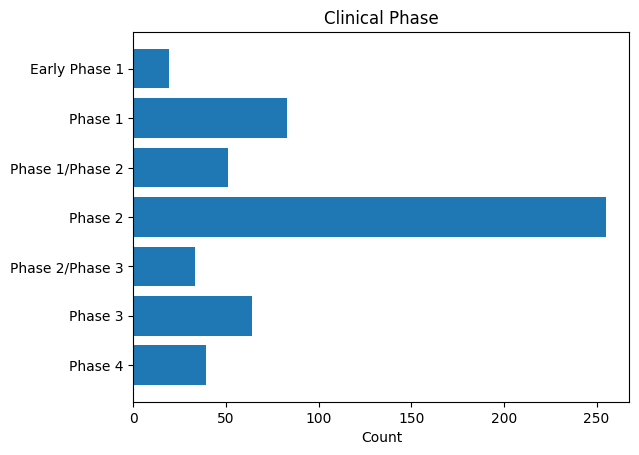

In [54]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(index_li, num_li, align='center')
ax.invert_yaxis()  
ax.set_xlabel('Count')
ax.set_title('Clinical Phase')
plt.show()

### 8
### 地图交互显示
### Interactive Display on Map

In [55]:
geo_dict = covid19.get_geo_data()

In [57]:
# Get a map of clinical trial
# 获得临床实验数据地图
covid19.get_map(data_df,geo_dict)

In [56]:
# Get a map of Phase 4
# 临床4期实验数据地图
covid19.get_map(data_df,geo_dict,['Phase 4'])